<a href="https://colab.research.google.com/github/kasnk/Deep_Learning/blob/main/DL_Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np

np.random.seed(0)
n_samples=100
true_function=lambda X:np.cos(1.5*np.pi*X)
X=np.sort(np.random.rand(n_samples))
y=true_function(X)+np.random.randn(n_samples)*0.1

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80,)
Shape of X_test: (20,)
Shape of y_train: (80,)
Shape of y_test: (20,)


In [17]:
degree_1 = 1
degree_4 = 4
degree_15 = 15

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_and_evaluate_polynomial_regression(degree):
    """
    Fits a polynomial regression model of a given degree and evaluates its performance.

    Args:
        degree: The degree of the polynomial features.

    Returns:
        A tuple containing the training MSE and testing MSE.
    """
    # Reshape X_train and X_test for PolynomialFeatures
    X_train_reshaped = X_train.reshape(-1, 1)
    X_test_reshaped = X_test.reshape(-1, 1)

    # Generate polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = polynomial_features.fit_transform(X_train_reshaped)
    X_test_poly = polynomial_features.transform(X_test_reshaped)

    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_mse, test_mse

In [19]:
train_mse_degree1, test_mse_degree1 = fit_and_evaluate_polynomial_regression(degree_1)
print(f"Degree {degree_1} - Train MSE: {train_mse_degree1:.4f}, Test MSE: {test_mse_degree1:.4f}")

Degree 1 - Train MSE: 0.2245, Test MSE: 0.1259


In [20]:
train_mse_degree4, test_mse_degree4 = fit_and_evaluate_polynomial_regression(degree_4)
print(f"Degree {degree_4} - Train MSE: {train_mse_degree4:.4f}, Test MSE: {test_mse_degree4:.4f}")

Degree 4 - Train MSE: 0.0096, Test MSE: 0.0098


In [21]:
train_mse_degree15, test_mse_degree15 = fit_and_evaluate_polynomial_regression(degree_15)
print(f"Degree {degree_15} - Train MSE: {train_mse_degree15:.4f}, Test MSE: {test_mse_degree15:.4f}")

Degree 15 - Train MSE: 0.0092, Test MSE: 0.0304


In [22]:
print("--- Mean Squared Error Results ---")
print(f"Degree {degree_1}:")
print(f"  Training MSE: {train_mse_degree1:.4f}")
print(f"  Testing MSE: {test_mse_degree1:.4f}")
print(f"Degree {degree_4}:")
print(f"  Training MSE: {train_mse_degree4:.4f}")
print(f"  Testing MSE: {test_mse_degree4:.4f}")
print(f"Degree {degree_15}:")
print(f"  Training MSE: {train_mse_degree15:.4f}")
print(f"  Testing MSE: {test_mse_degree15:.4f}")

--- Mean Squared Error Results ---
Degree 1:
  Training MSE: 0.2245
  Testing MSE: 0.1259
Degree 4:
  Training MSE: 0.0096
  Testing MSE: 0.0098
Degree 15:
  Training MSE: 0.0092
  Testing MSE: 0.0304


In [23]:
import matplotlib.pyplot as plt

def plot_polynomial_regression(degree, model, polynomial_features, X_train, y_train, X_test, y_test, true_function):
    """
    Plots the original data, the true function, and the predicted polynomial regression curve.

    Args:
        degree: The degree of the polynomial.
        model: The fitted polynomial regression model.
        polynomial_features: The fitted PolynomialFeatures transformer.
        X_train: Training data X.
        y_train: Training data y.
        X_test: Testing data X.
        y_test: Testing data y.
        true_function: The true function used to generate the data.
    """
    # Generate smooth x-values for plotting
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)

    # Transform the x-values using the polynomial features
    X_plot_poly = polynomial_features.transform(X_plot)

    # Predict the corresponding y-values
    y_plot_pred = model.predict(X_plot_poly)

    # Calculate the true function values
    y_plot_true = true_function(X_plot)

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.6)
    plt.scatter(X_test, y_test, label='Testing Data', alpha=0.6)
    plt.plot(X_plot, y_plot_true, label='True Function', color='green')
    plt.plot(X_plot, y_plot_pred, label=f'Predicted Curve (Degree {degree})', color='red')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [24]:
def fit_and_evaluate_polynomial_regression(degree):
    """
    Fits a polynomial regression model of a given degree and evaluates its performance.

    Args:
        degree: The degree of the polynomial features.

    Returns:
        A tuple containing the training MSE, testing MSE, fitted model, and polynomial features transformer.
    """
    # Reshape X_train and X_test for PolynomialFeatures
    X_train_reshaped = X_train.reshape(-1, 1)
    X_test_reshaped = X_test.reshape(-1, 1)

    # Generate polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = polynomial_features.fit_transform(X_train_reshaped)
    X_test_poly = polynomial_features.transform(X_test_reshaped)

    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_mse, test_mse, model, polynomial_features

train_mse_degree1, test_mse_degree1, model_degree1, poly_features_degree1 = fit_and_evaluate_polynomial_regression(degree_1)

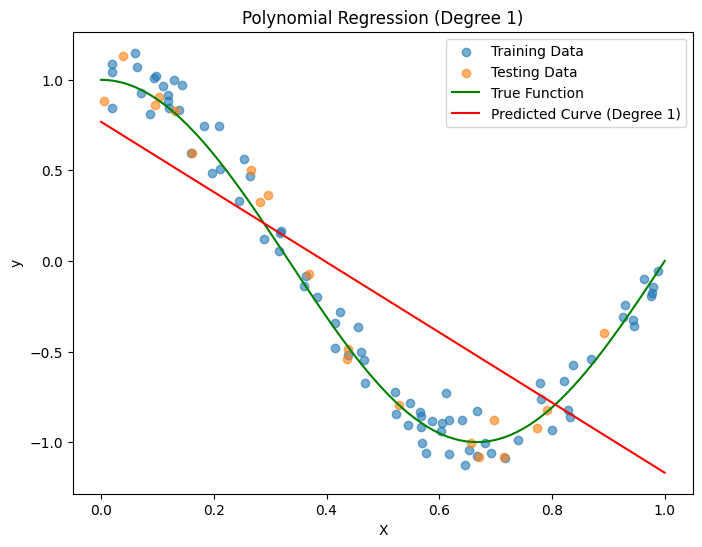

In [25]:
plot_polynomial_regression(degree_1, model_degree1, poly_features_degree1, X_train, y_train, X_test, y_test, true_function)

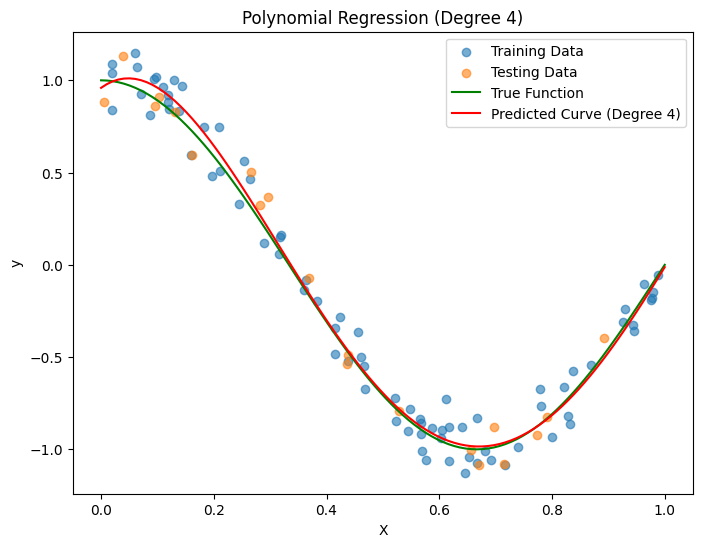

In [26]:
train_mse_degree4, test_mse_degree4, model_degree4, poly_features_degree4 = fit_and_evaluate_polynomial_regression(degree_4)
plot_polynomial_regression(degree_4, model_degree4, poly_features_degree4, X_train, y_train, X_test, y_test, true_function)

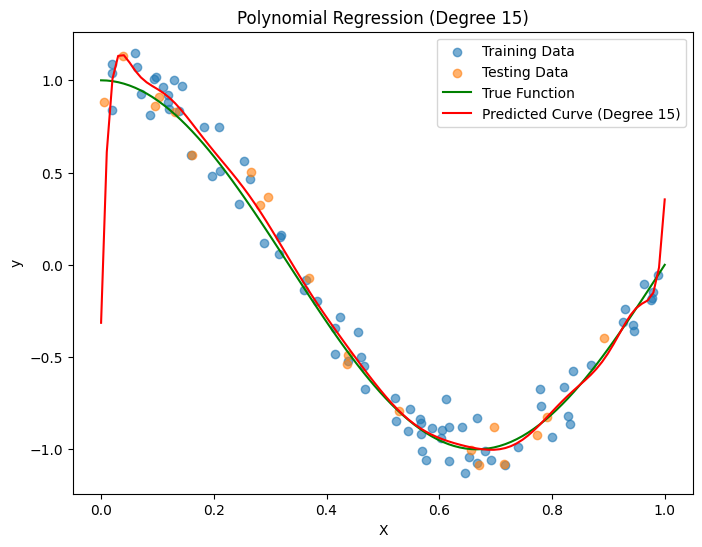

In [27]:
train_mse_degree15, test_mse_degree15, model_degree15, poly_features_degree15 = fit_and_evaluate_polynomial_regression(degree_15)
plot_polynomial_regression(degree_15, model_degree15, poly_features_degree15, X_train, y_train, X_test, y_test, true_function)